# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
from keras.preprocessing.image import load_img, img_to_array

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [45]:
def create_padding(input_image, d):
    n, m = input_image.shape
    output_image = np.zeros((n + 2 * d, m + 2 * d))
    output_image[d:n + d, d:m + d] = input_image
    return output_image


**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [46]:
def convolution(input_image, kernel):
    n, m = input_image.shape
    k, _ = kernel.shape  
    output_height = n - k + 1
    output_width = m - k + 1

    output_image = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            region = input_image[i:i+k, j:j+k]
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image


**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [47]:
def pooling(input_image, p, pooling_type="max_pooling"):
    n, m = input_image.shape
    output_height = n - p + 1
    output_width = m - p + 1
    
    output_image = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            region = input_image[i:i+p, j:j+p]
            
            if pooling_type == "max_pooling":
                output_image[i, j] = np.max(region)
            
            elif pooling_type == "avg_pooling":
                output_image[i, j] = np.mean(region)
            
            else:
                print("Error: Invalid pooling type")
                return None
    
    return output_image


The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

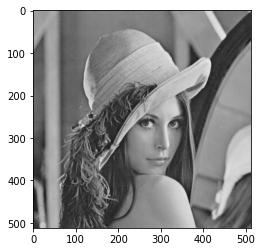

In [48]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

**Answer** 
1. This kernal highlights vertical edges in the image. 
2. This kernal highlights horizontal edges in the image.
3. This kernal also more sophisticated filter for detecting vertical edges. This commonly used in edge detection algorithms because it is more sensitive to vertical changes in intensity, producing smoother edges than the simple vertical edge detection kernal.
4. This is the counterpart of the previous kernel, designed to detect horizontal edges.
5. This kernel performs a Gaussian blur, which smooths the image. This reduces noise and detail by averaging the surrounding pixels, giving more weight to the center pixels.

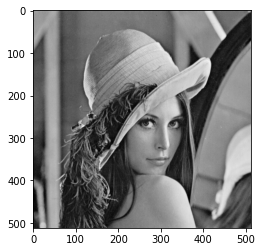

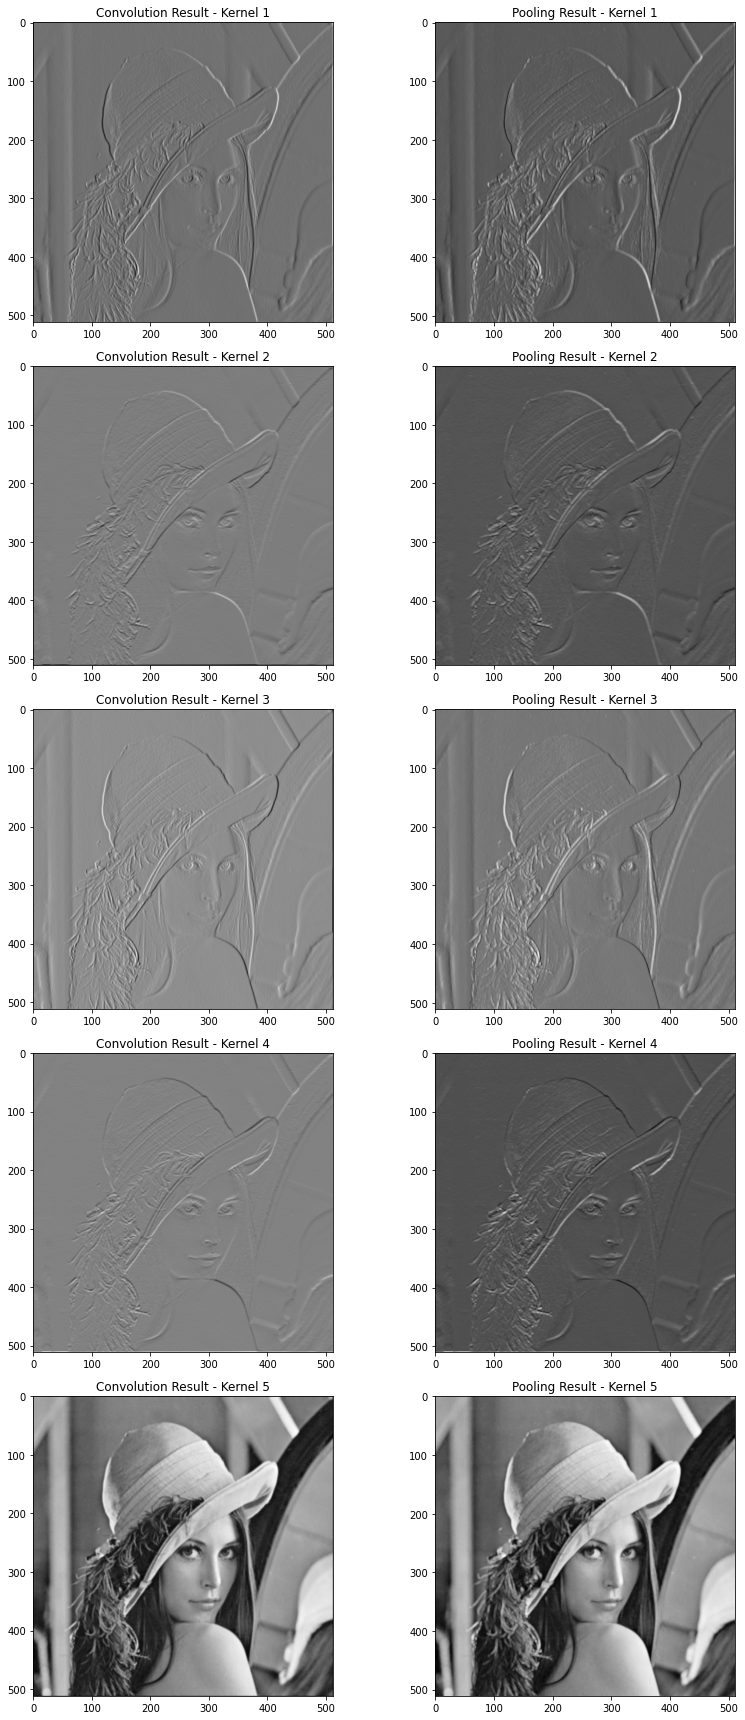

In [50]:
import numpy as np
import matplotlib.pyplot as plt

lena = load_img('lena.gif', color_mode='grayscale')
lena = img_to_array(lena).squeeze()  
plt.imshow(lena, cmap='gray')
plt.show()

kernels = [
    np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),  
    np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]), 
    np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),  
    np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),  
    np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16  
 ]

def pad_image(input_image, pad_size):
    return create_padding(input_image, pad_size)

fig, axes = plt.subplots(5, 2, figsize=(12, 24))

for i, kernel in enumerate(kernels):
    padded_image = pad_image(lena, kernel.shape[0] // 2)
    conv_result = convolution(padded_image, kernel)
    pooled_result = pooling(conv_result, p=2, pooling_type="max_pooling")
    axes[i, 0].imshow(conv_result, cmap='gray')
    axes[i, 0].set_title(f"Convolution Result - Kernel {i+1}")
    axes[i, 1].imshow(pooled_result, cmap='gray')
    axes[i, 1].set_title(f"Pooling Result - Kernel {i+1}")

plt.tight_layout()
plt.show()

Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** 

Kernel 1 and Kernel 3 effectively highlighted edges. Kernels that smooth or blur images demonstrated the importance of convolution in reducing noise or detail in the image.The max pooling operation effectively downsampled the images, reducing their dimensions while retaining the most significant features.

The experiment was largely successful in demonstrating the convolution and pooling operations. Each kernel applied to the image yielded distinct visual results. The output images reflected the effects of the different kernels, indicating that the convolution function correctly performed the mathematical operations.

### Learnings from the Experiment
From this experiment, I gained insights into the fundamentals of image processing, particularly how convolution and pooling operations manipulate image features. I learned that the choice of kernel significantly affects the output, highlighting different aspects of the image such as edges or textures. 

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

Testing configuration: num_conv_layers=2, num_filters=32, dense_units=64, batch_size=32
Average CV Accuracy: 0.6670
Testing configuration: num_conv_layers=2, num_filters=32, dense_units=64, batch_size=64
Average CV Accuracy: 0.6495
Testing configuration: num_conv_layers=2, num_filters=32, dense_units=128, batch_size=32
Average CV Accuracy: 0.6717
Testing configuration: num_conv_layers=2, num_filters=32, dense_units=128, batch_size=64
Average CV Accuracy: 0.6642
Testing configuration: num_conv_layers=2, num_filters=64, dense_units=64, batch_size=32
Average CV Accuracy: 0.6834
Testing configuration: num_conv_layers=2, num_filters=64, dense_units=64, batch_size=64
Average CV Accuracy: 0.6727
Testing configuration: num_conv_layers=2, num_filters=64, dense_units=128, batch_size=32
Average CV Accuracy: 0.6885
Testing configuration: num_conv_layers=2, num_filters=64, dense_units=128, batch_size=64
Average CV Accuracy: 0.6811
Testing configuration: num_conv_layers=3, num_filters=32, dense_unit

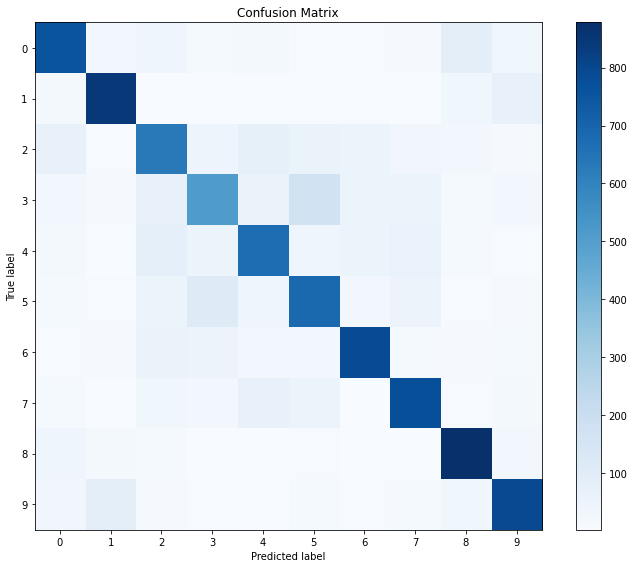

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_test = x_test.astype('float32') / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define a function to create the CNN model with hyperparameters
def create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), dense_units=64, activation='relu'):
    model = models.Sequential()
    model.add(layers.Conv2D(num_filters, kernel_size, activation=activation, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    for _ in range(1, num_conv_layers):
        model.add(layers.Conv2D(num_filters * 2, kernel_size, activation=activation))
        model.add(layers.MaxPooling2D((2, 2)))
        num_filters *= 2  # Double the filters in each layer
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter ranges to test
num_conv_layers_options = [2, 3]
num_filters_options = [32, 64]
dense_units_options = [64, 128]
batch_size_options = [32, 64]

# Initialize variables for tracking the best model
best_accuracy = 0.0
best_hyperparameters = {}

# Loop through different hyperparameter combinations
for num_conv_layers in num_conv_layers_options:
    for num_filters in num_filters_options:
        for dense_units in dense_units_options:
            for batch_size in batch_size_options:
                print(f'Testing configuration: num_conv_layers={num_conv_layers}, num_filters={num_filters}, '
                      f'dense_units={dense_units}, batch_size={batch_size}')

                kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
                cross_val_accuracies = []

                # Perform 5-fold cross-validation
                for train_index, val_index in kf.split(x_train, np.argmax(y_train, axis=1)):
                    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                    model = create_model(
                        num_conv_layers=num_conv_layers,
                        num_filters=num_filters,
                        dense_units=dense_units
                    )
                    model.fit(x_train_fold, y_train_fold, epochs=5, batch_size=batch_size, 
                              validation_data=(x_val_fold, y_val_fold), verbose=0)

                    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
                    cross_val_accuracies.append(val_accuracy)

                # Calculate the average cross-validation accuracy for this configuration
                avg_cv_accuracy = np.mean(cross_val_accuracies)
                print(f'Average CV Accuracy: {avg_cv_accuracy:.4f}')

                # Update the best-performing model configuration
                if avg_cv_accuracy > best_accuracy:
                    best_accuracy = avg_cv_accuracy
                    best_hyperparameters = {
                        'num_conv_layers': num_conv_layers,
                        'num_filters': num_filters,
                        'dense_units': dense_units,
                        'batch_size': batch_size
                    }

# Display the best hyperparameters
print(f'Best hyperparameters: {best_hyperparameters}')
print(f'Best cross-validation accuracy: {best_accuracy:.4f}')

# Train and evaluate the final model using the best hyperparameters
final_model = create_model(
    num_conv_layers=best_hyperparameters['num_conv_layers'],
    num_filters=best_hyperparameters['num_filters'],
    dense_units=best_hyperparameters['dense_units']
)

final_model.fit(x_train, y_train, epochs=10, batch_size=best_hyperparameters['batch_size'], verbose=0)
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), final_model.predict(x_test).argmax(axis=1))
print("Confusion Matrix:\n", confusion_mtx)

# Precision, Recall, and F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    np.argmax(y_test, axis=1), final_model.predict(x_test).argmax(axis=1), average=None
)

# Display Precision and Recall for each class
for i in range(10):
    print(f'Class {i}: Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}')

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** 

1. Overall Performance:
    -Best HyperParameters:'num_conv_layers': 3, 'num_filters': 64, 'dense_units': 128, 'batch_size': 32
    -Cross-Validation Accuracy: 70.40%
    -Test Accuracy: 73.31%
2. The confusion matrix and the precision-recall values reveal that some classes were more challenging to classify than others. For example, classes 2 and 3 had lower precision and recall values, indicating that the model struggled to distinguish these classes. In contrast, class 8 had the highest recall (87.80%), suggesting the model found this class easier to identify.
3. Overall, the experiment can be considered successful in terms of achieving a decent baseline performance and identifying the strengths and weaknesses of the model. It provided valuable insights into how different classes perform and how hyperparameter tuning impacts the model's ability to generalize.
4. I gained insights into designing convolutional neural networks, including how the choice of layers, filter sizes, and activation functions can impact the accuracy and generalization of the model. Additionally, I understood the significance of evaluating the model using metrics like confusion matrices, precision, and recall to assess the model's performance across different classes.